In [1]:
using StatsBase
using Tables

# fibonnaci sequence
function fib(n)
    if n < 2
        return n
    else
        return fib(n-1) + fib(n-2)
    end
end

# generate a random number from a fibonnaci sequence




fib (generic function with 1 method)

In [36]:
using Plots

# Section 1 Overview

Section 1 introduces you to Discrete Probability. Section 1 is divided into three parts:

Introduction to Discrete Probability
Combinations and Permutations
Addition Rule and Monty Hall
After completing Section 1, you will be able to:

apply basic probability theory to categorical data.
perform a Monte Carlo simulation to approximate the results of repeating an experiment over and over, including simulating the outcomes in the Monty Hall problem.
distinguish between: sampling with and without replacement, events that are and are not independent, and combinations and permutations.
apply the multiplication and addition rules, as appropriate, to calculate the probably of multiple events occurring.
use sapply() instead of a for loop to perform element-wise operations on a function.
There are 3 assignments that use the DataCamp platform for you to practice your coding skills. There are also some quick probability calculations for you to perform directly on the edX platform as well, and there is a longer set of problems at the end of section 1.

This section corresponds to the following section of the course textbook.

We encourage you to use R to interactively test out your answers and further your learning.



# Discrete Probability


RAFAEL IRIZARRY: We start by covering some basic principles related to categorical data.

This subset of probability is referred to as discrete probability.

It will help us understand the probability theory we will later introduce for numeric and continuous data, which is more common in data science applications.
Discrete probability is more useful in card games and we use these as examples.
The word probability is used in everyday language.
For example, Google's auto complete of, what are the chances of,gives us getting pregnant, having twins, and rain tomorrow.
Answering questions about probability is often hard, if not impossible.
Here, we discuss a mathematical definition of probability that does permit us to give precise answers to certain questions.
For example, if I have two red beads and three blue beads inside an urn and I pick one at random, what is the probability of picking a red one?
Our intuition tells us that the answer is 2/5, or 40%.
A precise definition can be given by noting that there are five possible outcomes of which two satisfy
the condition necessary for the event "pick a red bead."
Because each of the five outcomes has the same chance of occurring, we conclude that the probability is 0.4 for red and 0.6 for blue.
A more tangible way to think about the probability of an event is as a proportion of times the event occurs when we repeat the experiment over and over independently and under the same
conditions.
Before we continue, let's introduce some notation. We use the notation probability of A to denote the probability of an event A happening.
We use the very general term event to refer to things that can happen when something happens by chance.
For example, in our previous example, the event was picking a red bead.
In a political poll, in which we call 100 likely voters at random, an example of an event is calling 48 Democrats and 52 Republicans.
In data science applications, we will often deal with continuous variables.
In these cases, events will often be things like, is this person taller than 6 feet?
In this case, we write events in a more mathematical form.
For example, x greater than 6.
We'll see more of these examples later.
Here, we focus on categorical data and discrete probability.


The probability of an event is the proportion of times the event occurs when we repeat the experiment independently under the same conditions.

$$P(A) = \text{probability of event A}$$

An event is defined as an outcome that can occur when when something happens by chance.
We can determine probabilities related to discrete variables (picking a red bead, choosing 48 Democrats and 52 Republicans from 100 likely voters) and continuous variables (height over 6 feet).



Sure, I can help you with that. Here is the text with line breaks:

RAFAEL IRIZARRY: Computers provide a way to actually perform
the simple random experiments, such as the one we did before.
Pick a bead at random from a bag or an urn with 3 blue beads and 2 red ones.
Random number generators permit us to mimic the process of picking at random.
An example in R is the sample function.
We demonstrate its use showing you some code.
First, use the rep function to generate the urn.
We create an urn with 2 red and 3 blues.
You can see when we type beads we see this.
Now, we can use a sample function to pick one at random.
If we type sample beads comma 1, in this case, we get a blue.
This line of code produces one random outcome.
Now, we want to repeat this experiment over and over.
However, it is, of course, impossible to repeat forever.
Instead, we repeat the experiment a large enough number of times
to make the results practically equivalent to doing it
over and over forever.
This is an example of a Monte Carlo simulation.
Note that much of what mathematical and theoretical statisticians study--
something we do not cover in this course--
relates to providing rigorous definitions of practically equivalent,
as well as studying how close a large number of experiment
gets us to what happens in the limit, the limit meaning if we did it forever.
Later in this module, we provide a practical approach
to deciding what is large enough.
To perform our first Monte Carlo simulation,
we use the replicate function.
This permits us to repeat the same task any number of times we want.
Here, we repeat the random event 10,000 times.
We set B to be 10,000, then we use the replicate function
to sample from the beads 10,000 times.
We can now see if, in fact, our definition
is in agreement with this Monte Carlo simulation approximation.
We can use table, for example, to see the distribution.
And then we can use prop.table to give us the proportions.
And we see that, in fact, the Monte Carlo simulation
gives a very good approximation with 0.5962 for blue and 0.4038 for red.

Is there anything else I can help you with?


Monte Carlo simulations model the probability of different outcomes by repeating a random process a large enough number of times that the results are similar to what would be observed if the process were repeated forever.

The sample() function draws random outcomes from a set of options.

The replicate() function repeats lines of code a set number of times. It is used with sample() and similar functions to run Monte Carlo simulations.

In [2]:
# create an urn with 2 red, 3 blue balls
beads = ["red", "red", "blue", "blue", "blue"]


5-element Vector{String}:
 "red"
 "red"
 "blue"
 "blue"
 "blue"

In [3]:
# sample 1 bead from urn at random
sample(beads, 1, replace = true)


1-element Vector{String}:
 "blue"

This line of code produces one random outcome. We want to repeat this experiment an infinite number of times, but it is impossible to repeat forever. Instead, we repeat the experiment a large enough number of times to make the results practically equivalent to repeating forever. This is an example of a Monte Carlo simulation.

Much of what mathematical and theoretical statisticians study, which we do not cover in this book, relates to providing rigorous definitions of “practically equivalent” as well as studying how close a large number of experiments gets us to what happens in the limit. Later in this section, we provide a practical approach to deciding what is “large enough”.

To perform our first Monte Carlo simulation, we use the replicate function, which permits us to repeat the same task any number of times. Here, we repeat the random event  $$B =   10,000 \text{ times}$$

In [4]:
# create monte carlo simulation to sample 1 bead 10000 times
# the bead will be sampled with replacement
# the result will be a vector of 10000 beads

# create empty vector to store results
results = []

[push!(results, sample(beads, 1, replace = true)) for i in 1:10000];

In [5]:
countmap(results) # count the number of times each color was sampled

Dict{Any, Int64} with 2 entries:
  ["blue"] => 6021
  ["red"]  => 3979

In [6]:
proportionmap(results) # calculate the proportion of each color sampled

Dict{Any, Float64} with 2 entries:
  ["blue"] => 0.6021
  ["red"]  => 0.3979

# An important application of the mean() function
In R, applying the mean() function to a logical vector returns the proportion of elements that are TRUE. It is very common to use the mean() function in this way to calculate probabilities and we will do so throughout the course.

Suppose you have the vector beads from a previous video:

beads <- rep(c("red", "blue"), times = c(2,3))
beads
[1] "red" "red" "blue" "blue" "blue"
To find the probability of drawing a blue bead at random, you can run:

mean(beads == "blue")
[1] 0.6
This code is broken down into steps inside R. First, R evaluates the logical statement beads == "blue", which generates the vector:

FALSE FALSE TRUE TRUE TRUE
When the mean function is applied, R coerces the logical values to numeric values, changing TRUE to 1 and FALSE to 0:

0 0 1 1 1
The mean of the zeros and ones thus gives the proportion of TRUE values. As we have learned and will continue to see, probabilities are directly related to the proportion of events that satisfy a requirement.

In [8]:
beads = ["red", "red", "blue", "blue", "blue"]


5-element Vector{String}:
 "red"
 "red"
 "blue"
 "blue"
 "blue"

In [10]:
mean(beads .== "blue")

0.6

In [11]:
beads .== "blue"

5-element BitVector:
 0
 0
 1
 1
 1

Key points
The probability distribution for a variable describes the probability of observing each possible outcome.
For discrete categorical variables, the probability distribution is defined by the proportions for each group.

# Independance

Key points
Conditional probabilities compute the probability that an event occurs given information about dependent events. For example, the probability of drawing a second king given that the first draw is a king is:

$$Pr(\text{Card 2 is a King} \text{ | } \text{Card 1 is a King}) = \frac{3}{51}$$

- if two events A and B are independance then:
$$Pr(A \text{ | } B) = Pr(A) $$

To determine the probability of multiple events occurring, we use the multiplication rule.

# Multiplication Rule

All right now, if we want to know the probability of two events, say A and B,
occurring, we can use the multiplication rule.
So the probability of A and B is equal to the probability of A multiplied
by the probability of B, given that A already happened.

$$Pr(A \text{ and  } B) = Pr(A)Pr(B \text{ | } A) $$

So the probability of A and B is equal to the probability of A multiplied
by the probability of B, given that A already happened.

When we have independent events, the multiplication rule becomes simpler.
We simply multiply of  probabilities.
But we have to be very careful when we use this rule.
the multiplicative rule in practice.
We're assuming independence.

# Combinations and Permutations

In [12]:
# create a deck   of cards

suits = ["♠", "♥", "♦", "♣"] 
ranks = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]  #  13 cards

# create a deck of cards
# we will use a outer product to create a deck of cards
# the outer product will create a 13x4 matrix with all possible combinations of ranks and suits


13-element Vector{String}:
 "A"
 "2"
 "3"
 "4"
 "5"
 "6"
 "7"
 "8"
 "9"
 "10"
 "J"
 "Q"
 "K"

In [13]:
suits = reshape(suits, 1, 4) # reshape the suits vector to a 4x1 matrix
ranks = reshape(ranks, 13, 1) # reshape the ranks vector to a 1x13 matrix

13×1 Matrix{String}:
 "A"
 "2"
 "3"
 "4"
 "5"
 "6"
 "7"
 "8"
 "9"
 "10"
 "J"
 "Q"
 "K"

In [14]:
deck = suits .* ranks  # create a deck of cards using the outer product

13×4 Matrix{String}:
 "♠A"   "♥A"   "♦A"   "♣A"
 "♠2"   "♥2"   "♦2"   "♣2"
 "♠3"   "♥3"   "♦3"   "♣3"
 "♠4"   "♥4"   "♦4"   "♣4"
 "♠5"   "♥5"   "♦5"   "♣5"
 "♠6"   "♥6"   "♦6"   "♣6"
 "♠7"   "♥7"   "♦7"   "♣7"
 "♠8"   "♥8"   "♦8"   "♣8"
 "♠9"   "♥9"   "♦9"   "♣9"
 "♠10"  "♥10"  "♦10"  "♣10"
 "♠J"   "♥J"   "♦J"   "♣J"
 "♠Q"   "♥Q"   "♦Q"   "♣Q"
 "♠K"   "♥K"   "♦K"   "♣K"

In [15]:
# flatten the deck of cards back into a vector
deck = deck |> vec


52-element Vector{String}:
 "♠A"
 "♠2"
 "♠3"
 "♠4"
 "♠5"
 "♠6"
 "♠7"
 "♠8"
 "♠9"
 "♠10"
 ⋮
 "♣5"
 "♣6"
 "♣7"
 "♣8"
 "♣9"
 "♣10"
 "♣J"
 "♣Q"
 "♣K"

## Double check that the probability of a King on the first draw is 4/52 (or 1/13)

We simply compute the proportion of possible outcomes
that satisfy our condition.
So we create a vector that contains the four ways we can get a king.
That's going to be the kings variable.

And then we simply check what proportion of the deck is one of these cards
and we get the answer that we expect-

In [16]:
Kings = [ "♠K" ,  "♥K" ,  "♦K"  , "♣K"]

4-element Vector{String}:
 "♠K"
 "♥K"
 "♦K"
 "♣K"

In [17]:
mean(map(x -> x ∈ Kings, deck)) # calculate the probability of drawing a king, which is 1/13

0.07692307692307693

Now, how about the conditional probability of the second card being a king,
given that the first was a king?
Earlier we deduced that if 1 king is already out, then there's 51 left.

So the probability is 3 in 51.

And we can check that.

$$Pr(\text{Card 2 is a King} \text{ | } \text{Card 1 is a King}) = \frac{3}{51}$$

In [18]:
using Combinatorics

So here's an example--
here all the ways we can choose 2 numbers from the list 1, 2, 3, 4, 5.
Notice that the order matters.

In [19]:
elements = 1:5
n=2



2

In [20]:
perms = collect(permutations(elements, n)) # create all possible permutations of 2 elements from 1:5

20-element Vector{Vector{Int64}}:
 [1, 2]
 [1, 3]
 [1, 4]
 [1, 5]
 [2, 1]
 [2, 3]
 [2, 4]
 [2, 5]
 [3, 1]
 [3, 2]
 [3, 4]
 [3, 5]
 [4, 1]
 [4, 2]
 [4, 3]
 [4, 5]
 [5, 1]
 [5, 2]
 [5, 3]
 [5, 4]

So 3, 1 is different than 1, 3, So it appears in our permutations.
Also notice that 1, 1; 2, 2; and 3, 3 don't
appear, because once we pick a number, it can't appear again.

To compute all possible ways that we can choose 2 cards when the order matters,
we simply type the following piece of code.
Here we use permutations.
There's 52 cards, we're going to choose 2,
and we're going to select them out of the vector that includes our card
names, which we called deck earlier.

In [21]:
hands = collect(permutations(deck, 2)) # create all possible permutations of 2 elements from a deck of cards

2652-element Vector{Vector{String}}:
 ["♠A", "♠2"]
 ["♠A", "♠3"]
 ["♠A", "♠4"]
 ["♠A", "♠5"]
 ["♠A", "♠6"]
 ["♠A", "♠7"]
 ["♠A", "♠8"]
 ["♠A", "♠9"]
 ["♠A", "♠10"]
 ["♠A", "♠J"]
 ⋮
 ["♣K", "♣4"]
 ["♣K", "♣5"]
 ["♣K", "♣6"]
 ["♣K", "♣7"]
 ["♣K", "♣8"]
 ["♣K", "♣9"]
 ["♣K", "♣10"]
 ["♣K", "♣J"]
 ["♣K", "♣Q"]

In [22]:
size(hands)

(2652,)

In [23]:
# convert vector of vectors to matrix of 2652 x 2
# Convert card_permutations to a 2652x2 matrix
hands_matrix = [perm[i] for perm in hands, i in 1:2]

2652×2 Matrix{String}:
 "♠A"  "♠2"
 "♠A"  "♠3"
 "♠A"  "♠4"
 "♠A"  "♠5"
 "♠A"  "♠6"
 "♠A"  "♠7"
 "♠A"  "♠8"
 "♠A"  "♠9"
 "♠A"  "♠10"
 "♠A"  "♠J"
 ⋮     
 "♣K"  "♣4"
 "♣K"  "♣5"
 "♣K"  "♣6"
 "♣K"  "♣7"
 "♣K"  "♣8"
 "♣K"  "♣9"
 "♣K"  "♣10"
 "♣K"  "♣J"
 "♣K"  "♣Q"

In [24]:
# grab first and second cards (columns) from hands matrix
first_card = hands_matrix[:,1]


2652-element Vector{String}:
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 "♠A"
 ⋮
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"
 "♣K"

In [25]:
second_card = hands_matrix[:,2]

2652-element Vector{String}:
 "♠2"
 "♠3"
 "♠4"
 "♠5"
 "♠6"
 "♠7"
 "♠8"
 "♠9"
 "♠10"
 "♠J"
 ⋮
 "♣4"
 "♣5"
 "♣6"
 "♣7"
 "♣8"
 "♣9"
 "♣10"
 "♣J"
 "♣Q"

And now we can, for example, check how many cases
have a first card that is a king--
that's 204.
And now to find the conditional probability,
we ask what fraction of these 204 have also a king in the second card.
So this case we type the following piece of code.
We add all the cases that have king in the first, king in the second,
and divide by the cases that have a king in the first.

In [26]:


sum(map(x -> x ∈ Kings, first_card) .& map(x -> x ∈ Kings, second_card)) / sum(map(x -> x ∈ Kings, first_card))

0.058823529411764705

And now we get the answer 0.058 , which is exactly 3 out of 51,
which we had already deduced.

# The Birthsday Problem

 Suppose you're in a classroom with 50 people.
If we assume this is a randomly selected group,
what is the chance that at least two people have the same birthday?
Although it is somewhat advanced, we can actually deduce this mathematically,
and we do this later, but now, we're going to use Monte Carlo simulations.
For simplicity, we assumed that nobody was born on February 29th.
This actually doesn't change the answer much.

All right, first, note that birthdays can be represented
as numbers between 1 and 365.
So a sample of 50 random birthdays can be obtained simply
using the sample function, like this.

$$sample(1:365, 50, replace = true)$$

In [27]:
b = sample(1:365, 50, replace  = true) # sample of birthsdays

50-element Vector{Int64}:
  11
 287
 237
 318
 286
 171
 274
 283
  66
 223
   ⋮
  36
 277
  72
 363
 126
 304
 260
 268
 289

In [28]:

"""
duplicated(v::Vector)

Return a boolean array indicating which elements of the input vector `v` are duplicates.
Duplicate elements are marked as `true`, including the first occurrence.

# Arguments
- `v::Vector`: Input vector to check for duplicates.

# Returns
- A boolean array of the same length as `v` indicating which elements are duplicates.
"""
function duplicated(v::Vector)
    unique_values = unique(v)
    is_duplicate = falses(length(v))
    for x in unique_values
        indices = findall(x .== v)
        if length(indices) > 1
            is_duplicate[indices] .= true
        end
    end
    return is_duplicate
end



duplicated

In [29]:
any(duplicated(b)) # test weather any birthdays are duplicated

true

Now, to estimate the probability, we're going to repeat this experiment.
We're going to run a Monte Carlo simulation over and over again.
So what we do is we do it 10,000 times.

In [30]:
# create monte carlo simulation to calculate probability of  bdays being duplicated
# the bday will be sampled with replacement 10000 times

# create empty vector to store results
results = []

[push!(results, sample(1:365, 50, replace  = true) |> duplicated |> any) for i in 1:10000];

In [31]:
mean(results) # calculate the probability of 50 bdays being duplicated

0.9707

So the probability that at least two people in a room of 50 have the same birthday is about 98%

 Say you want to use what you've just
learned about the birthday problem to bet
with friends about two people having the same birthday in a group of people.
When are the chances larger than 50%?
Larger than 75%?
Let's create a lookup table.
We can quickly create a function to compute this for any group.
We write the function like this.
We'll call it compute prob, and we'll basically
make the calculations for the probability
of two people having the same birthday.
We will use a small Monte Carlo simulation to do it.

In [33]:
function compute_prob(n; B=10000)
    results = []
    [push!(results, sample(1:365, n, replace  = true) |> duplicated |> any) for i in 1:B];
    return mean(results)
end

compute_prob (generic function with 1 method)

Now that we've done this, we want to compute this function,
we want to apply this function to several values of n,
let's say from 1 to 60.

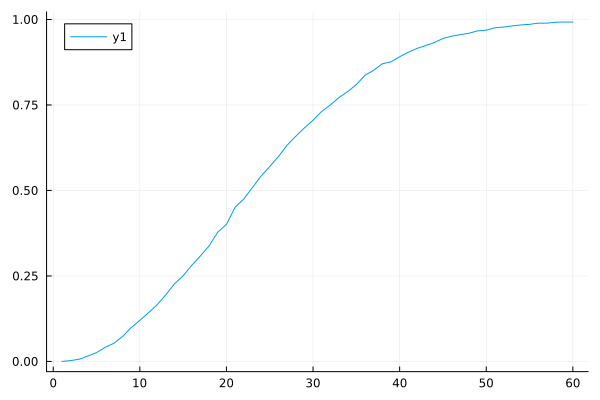

In [37]:
map(compute_prob, 1:60) |> plot